In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### Boxplots

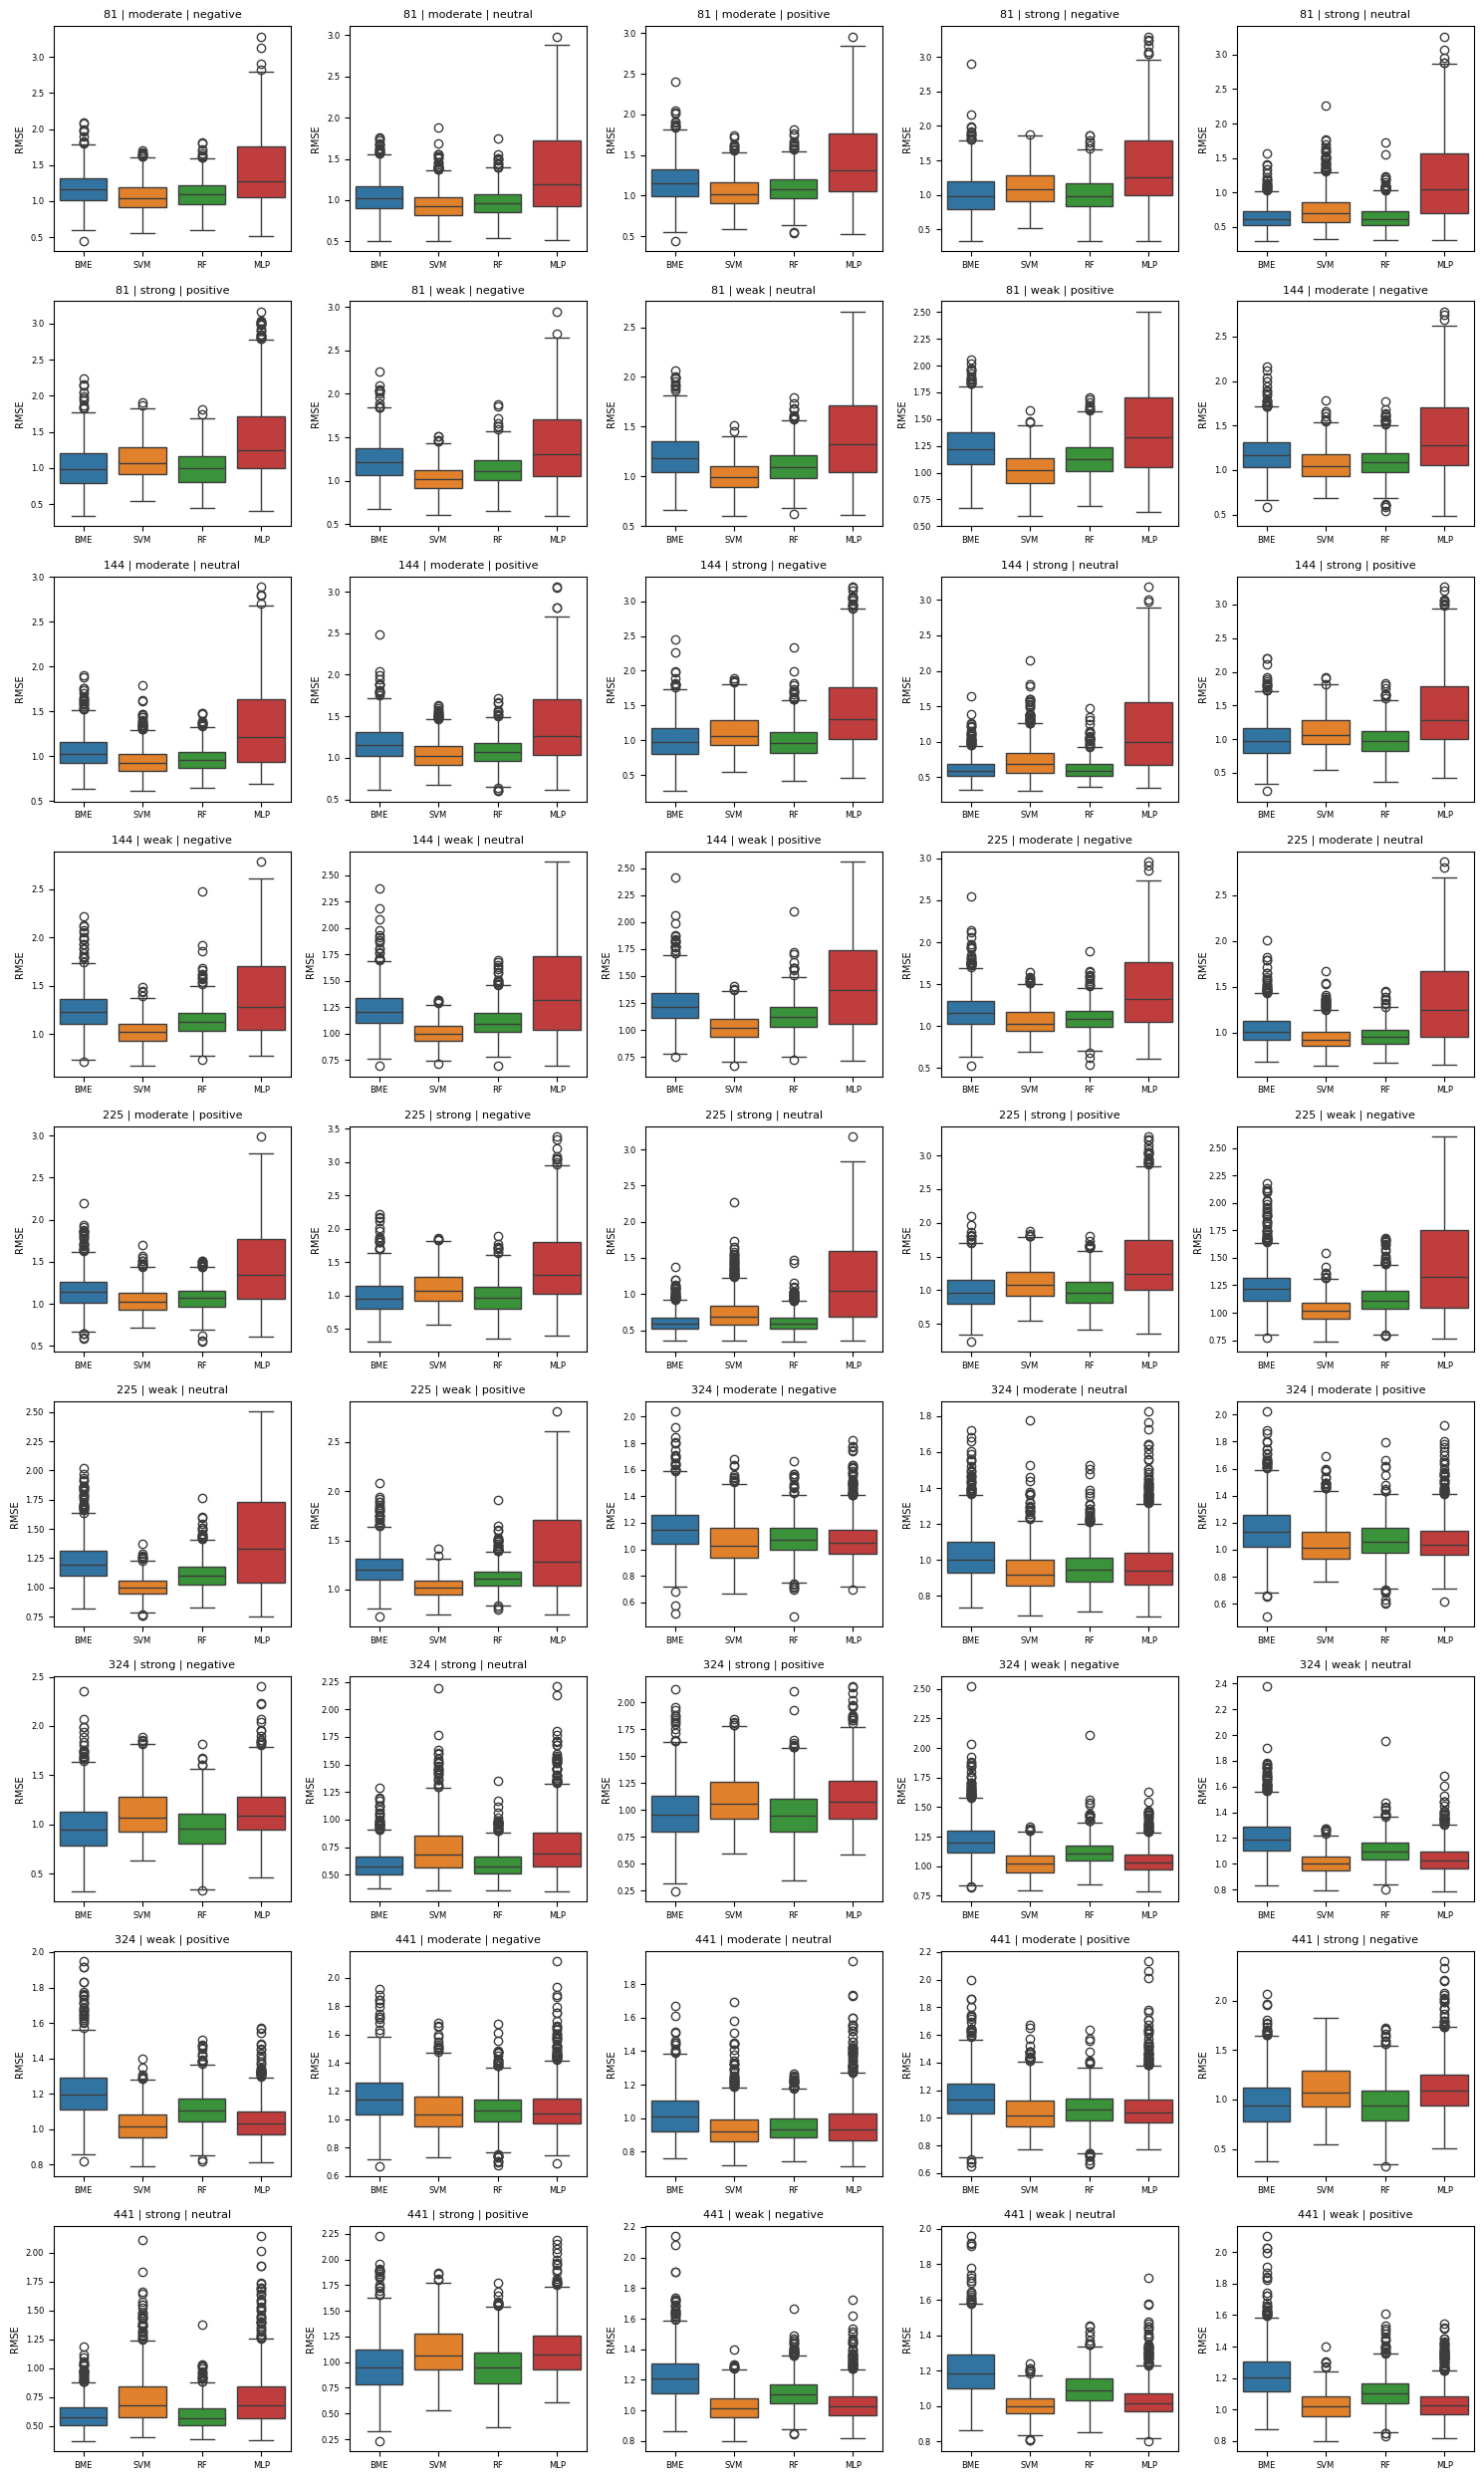

In [5]:
# Charger le fichier
file_path = "../results/results_combined/resultats_combines.xlsx"
df = pd.read_excel(file_path, sheet_name='resultats_combines')
df = df.sort_values(by=["Size", "Dependance", "Asymetrie"]).reset_index(drop=True)

# Créer une colonne scénario
df['Scenario'] = df['Size'].astype(str) + ' | ' + df['Dependance'] + ' | ' + df['Asymetrie']
scenarios = df['Scenario'].unique()

# Définir les couleurs fixes par modèle
model_order = ['BME', 'SVM', 'RF', 'MLP']
palette = {
    'BME': '#1f77b4',         # bleu
    'SVM': '#ff7f0e',         # orange
    'RF': '#2ca02c',          # vert
    'MLP': '#d62728'          # rouge
}

# Subplots
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(15, 25))
axes = axes.flatten()

for i, scenario in enumerate(scenarios):
    ax = axes[i]
    subset = df[df['Scenario'] == scenario]
    sns.boxplot(x='Modele', y='RMSE', data=subset, ax=ax, order=model_order, palette=palette)
    ax.set_title(scenario, fontsize=8)
    ax.set_xlabel('')
    ax.set_ylabel('RMSE', fontsize=7)
    ax.tick_params(axis='x', labelsize=6)
    ax.tick_params(axis='y', labelsize=6)

# Supprimer les cases vides
for j in range(len(scenarios), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# plt.savefig("boxplots_RMSE_45_scenarios1.png", dpi=300)
plt.show()

### MAE variation according to spatial dependance

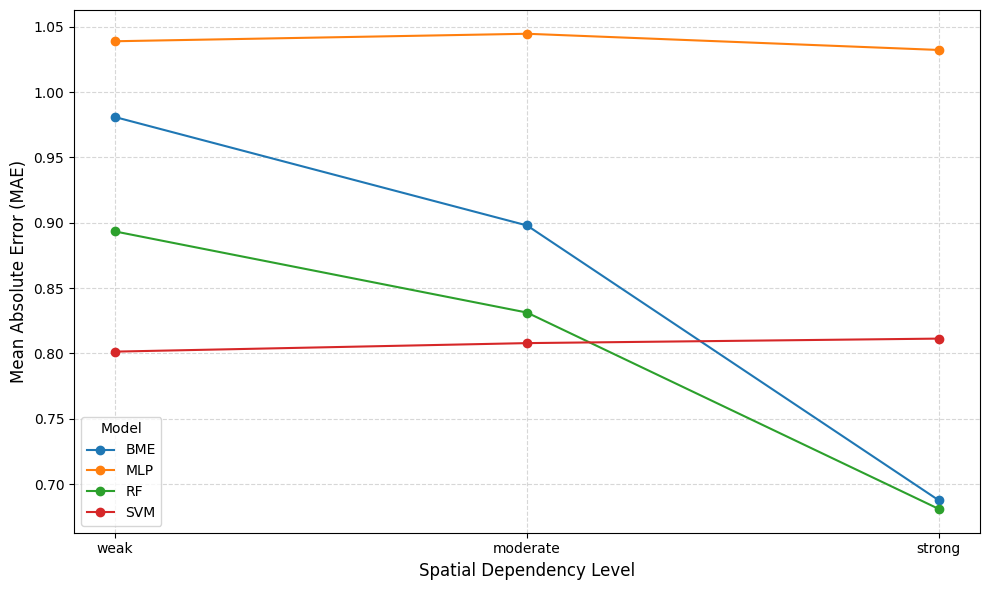

In [ ]:
# Charger les données
data = pd.read_excel(file_path, sheet_name='resultats_combines')

# Filtrer les colonnes pertinentes
data_filtered = data[["MAE", "Modele", "Dependance"]].copy()
data_filtered.columns = ["MAE", "Model", "Dependency"]

# Forcer l'ordre des niveaux de dépendance
dependency_order = ["weak", "moderate", "strong"]
data_filtered["Dependency"] = pd.Categorical(data_filtered["Dependency"], categories=dependency_order, ordered=True)

# Calculer les moyennes par modèle et dépendance
grouped_stats = data_filtered.groupby(["Model", "Dependency"]).agg(
    MAE_mean=("MAE", "mean")
).reset_index()

# Créer le graphique à courbes
plt.figure(figsize=(10, 6))
for model in grouped_stats["Model"].unique():
    subset = grouped_stats[grouped_stats["Model"] == model]
    plt.plot(
        subset["Dependency"],
        subset["MAE_mean"],
        label=model,
        marker='o',
        linestyle='-'
    )


#plt.title("Variation of mean MAE by spatial dependency level for each model", fontsize=12)
plt.xlabel("Spatial Dependency Level", fontsize=12)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Model")
plt.tight_layout()
#plt.savefig("mae_dependency_curve.png", dpi=300)
plt.show()


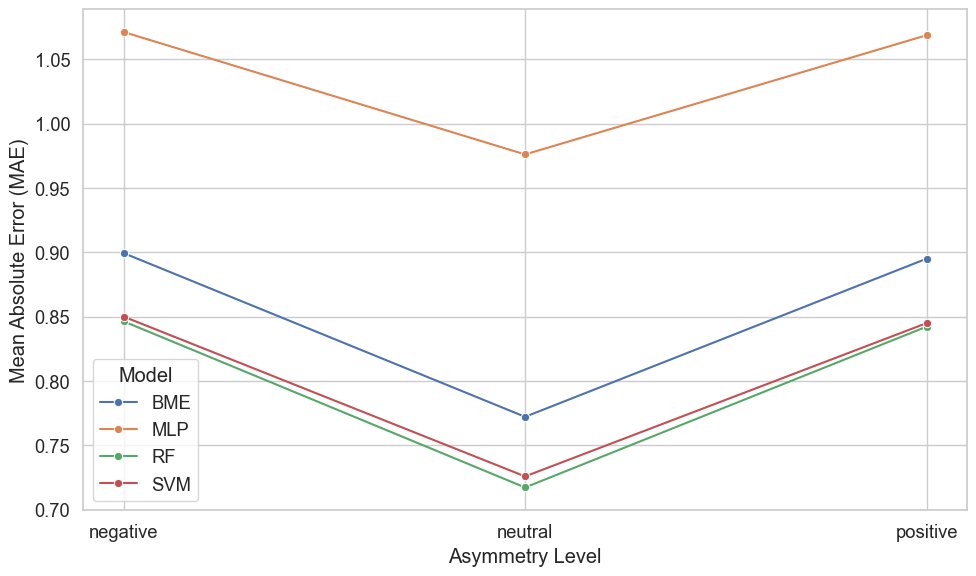

In [7]:
# Charger les données
data = pd.read_excel(file_path, sheet_name='resultats_combines')

# Renommer pour uniformiser
df = df.rename(columns={"MAE": "mae", "Modele": "model", "Asymetrie": "asymmetry"})

# Forcer l’ordre des niveaux d’asymétrie
asymmetry_order = ["negative", "neutral", "positive"]
df["asymmetry"] = pd.Categorical(df["asymmetry"], categories=asymmetry_order, ordered=True)

# Calcul des moyennes
mean_mae = df.groupby(["model", "asymmetry"])["mae"].mean().reset_index()

# Initialiser le style
sns.set(style="whitegrid", font_scale=1.2)

# Créer le graphique
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=mean_mae,
    x="asymmetry",
    y="mae",
    hue="model",
    marker="o"
)

# Personnalisation
#plt.title("Variation of Mean MAE by Spatial Asymmetry Level", fontsize=14)
plt.xlabel("Asymmetry Level")
plt.ylabel("Mean Absolute Error (MAE)")
plt.legend(title="Model")
plt.tight_layout()
#plt.savefig("mae_dependency_curve_asym.png", dpi=300)

# Affichage
plt.show()


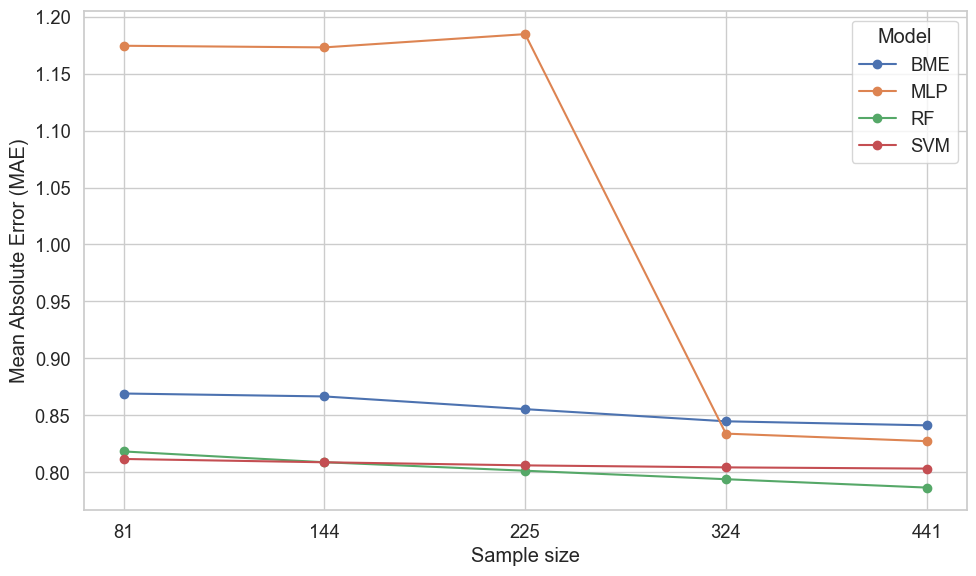

In [8]:
# Charger les données
df = pd.read_excel(file_path, sheet_name='resultats_combines')

# Filtrer pour ne garder que les colonnes nécessaires
df = df[['MAE', 'Modele', 'Size']]

# Convertir les tailles en ordre numérique pour un bon tri
taille_order = ['81', '144', '225', '324', '441']
df['Size'] = df['Size'].astype(str)
df['Size'] = pd.Categorical(df['Size'], categories=taille_order, ordered=True)

# Calculer la moyenne du MAE pour chaque combinaison Modele x Size
df_grouped = df.groupby(['Modele', 'Size'])['MAE'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
for model in df_grouped['Modele'].unique():
    subset = df_grouped[df_grouped['Modele'] == model]
    plt.plot(subset['Size'], subset['MAE'], marker='o', label=model)

plt.xlabel("Sample size")
plt.ylabel("Mean Absolute Error (MAE)")
#plt.title("Variation of MAE according to sample size")
plt.legend(title="Model")
plt.grid(True)
plt.tight_layout()
#plt.savefig("mae_size_effect.png", dpi=300)
plt.show()